In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('clean_data.xlsx', index_col='id_case')

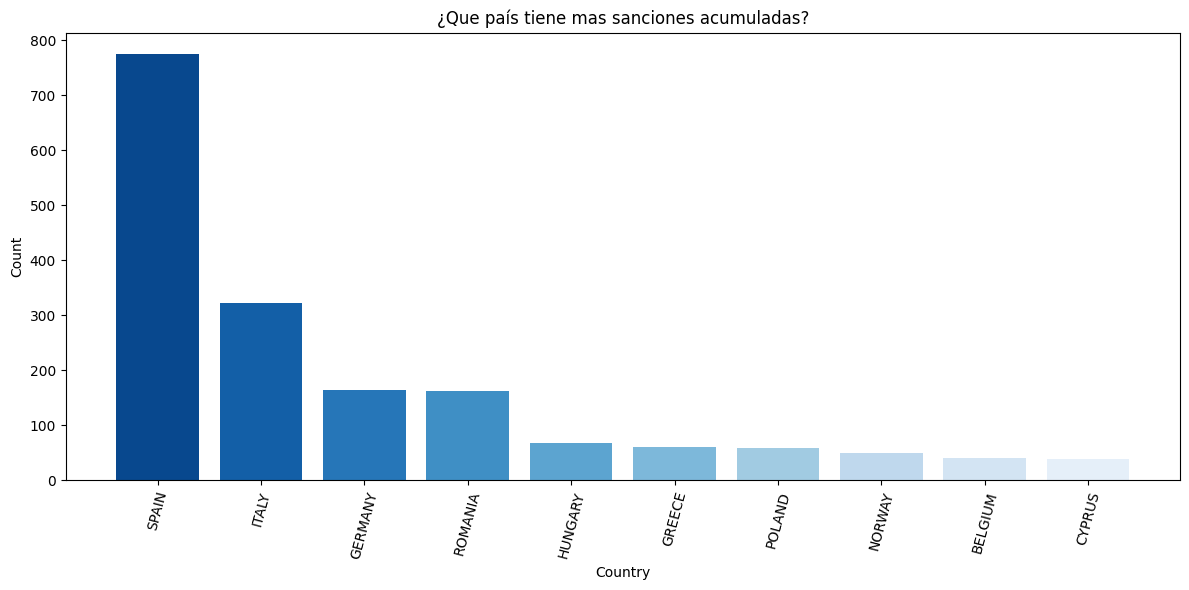

In [2]:
df_aux = df['country'].value_counts().head(10)


colors = sns.color_palette("Blues", len(df_aux))[::-1]

plt.figure(figsize=(12, 6))
plt.bar(df_aux.index, df_aux, color=colors)  
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('¿Que país tiene mas sanciones acumuladas?')
plt.xticks(rotation=75) 


plt.tight_layout()
plt.show()



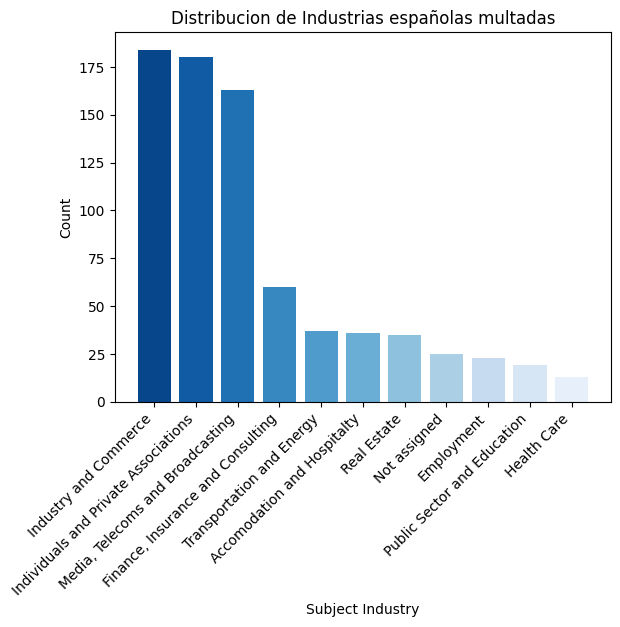

In [7]:
df_aux = df.query("country == 'SPAIN'")
# Get the counts for each subject industry
industry_counts = df_aux["subjet_industry"].value_counts()

# Set the Seaborn color palette to "Blues"
sns.set_palette("Blues")

# Get the colors for each bar and reverse the order
colors = sns.color_palette("Blues", len(industry_counts))[::-1]

# Sort the industry counts in descending order
industry_counts = industry_counts.sort_values(ascending=False)

# Create the bar plot
ax = plt.bar(industry_counts.index, industry_counts, color=colors)

plt.title("Distribucion de Industrias españolas multadas")
plt.xlabel("Subject Industry")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

plt.show()

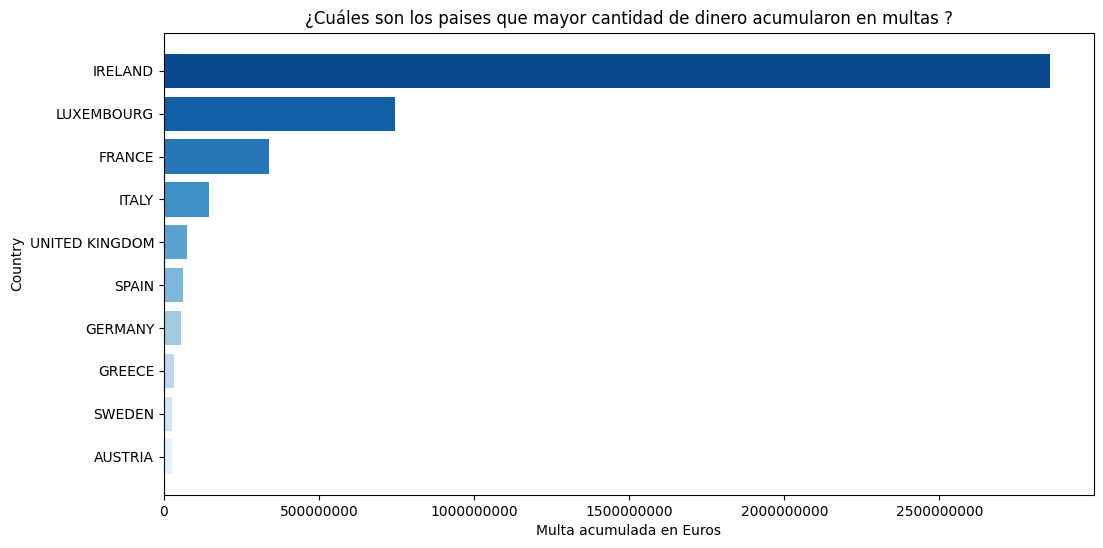

In [3]:
#cuales son los paises que tienen la mayor cantidad acumulada de multas?
df_aux = df.groupby("country")["penalty_fee"].sum().reset_index().sort_values(by = "penalty_fee").tail(10)

colors = sns.color_palette("Blues", len(df_aux))

plt.figure(figsize=(12, 6))
plt.barh(df_aux.country, df_aux.penalty_fee, color=colors)  

plt.ticklabel_format(style='plain', axis='x') 
plt.xlabel('Multa acumulada en Euros') 
plt.ylabel('Country')
plt.title('¿Cuáles son los paises que mayor cantidad de dinero acumularon en multas ?')
plt.show()

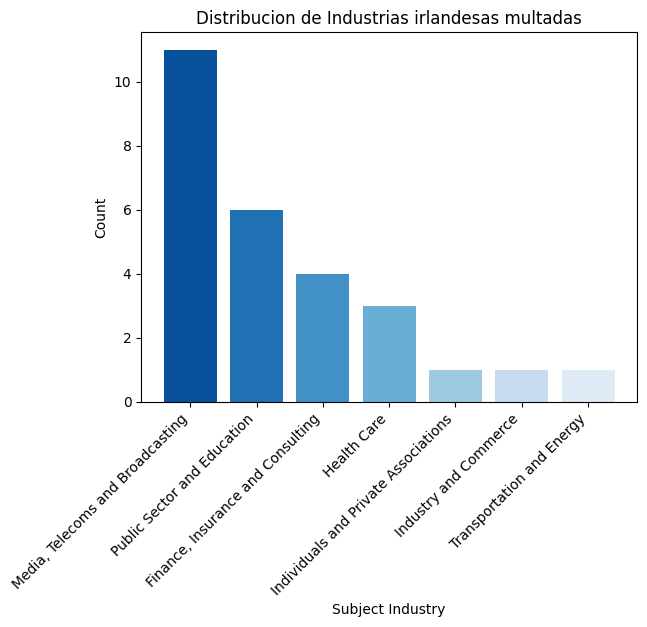

In [13]:
df_aux = df.query("country == 'IRELAND'")
# Get the counts for each subject industry
industry_counts = df_aux["subjet_industry"].value_counts()

# Set the Seaborn color palette to "Blues"
sns.set_palette("Blues")

# Get the colors for each bar and reverse the order
colors = sns.color_palette("Blues", len(industry_counts))[::-1]

# Sort the industry counts in descending order
industry_counts = industry_counts.sort_values(ascending=False)

# Create the bar plot
ax = plt.bar(industry_counts.index, industry_counts, color=colors)

plt.title("Distribucion de Industrias irlandesas multadas")
plt.xlabel("Subject Industry")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()


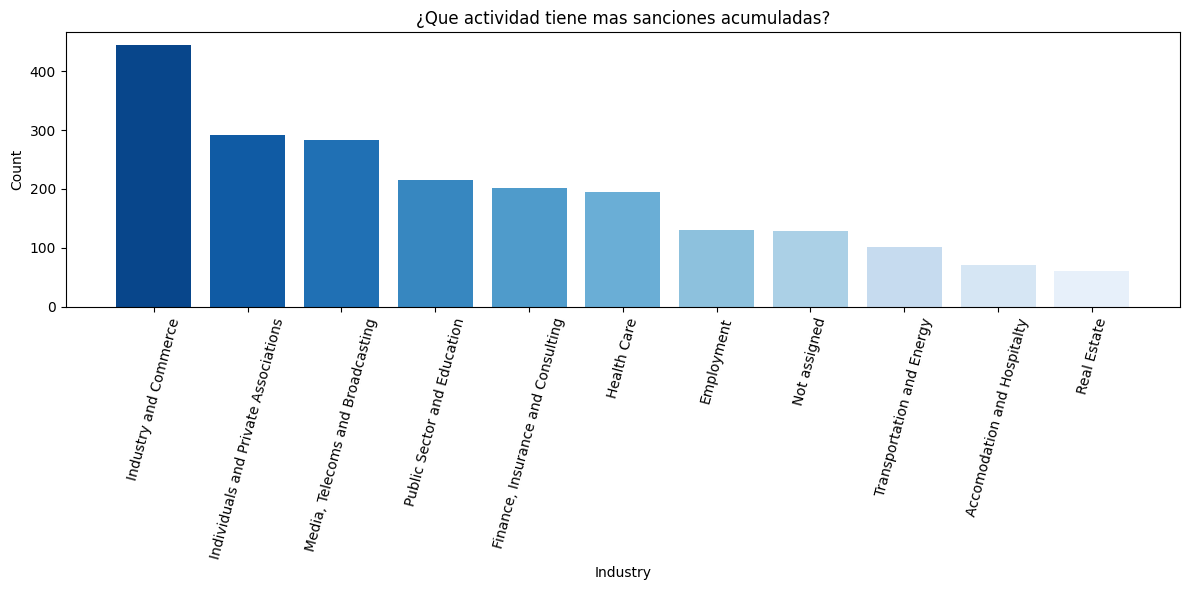

In [4]:
#que industria es la mas afectada por el GDPR
df_aux = df['subjet_industry'].value_counts()

colors = sns.color_palette("Blues", len(df_aux))[::-1]

plt.figure(figsize=(12, 6))
plt.bar(df_aux.index, df_aux, color=colors)  
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('¿Que actividad tiene mas sanciones acumuladas?')
plt.xticks(rotation=75)  

# Show the plot
plt.tight_layout()
plt.show()

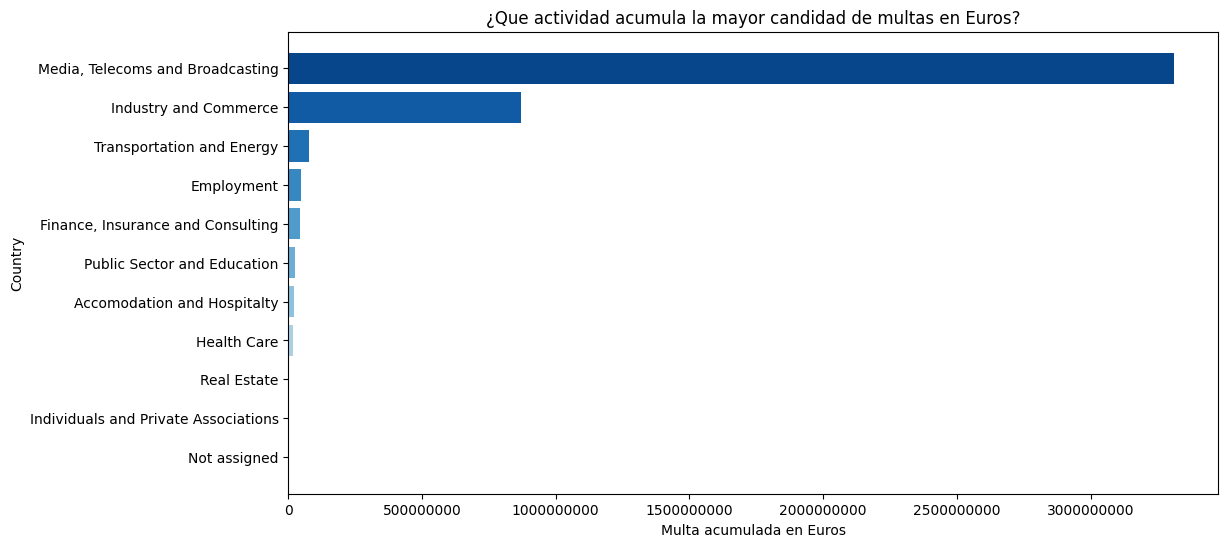

In [5]:
#cuales son las industrias que tienen la mayor cantidad acumulada de multas?
df_aux = df.groupby("subjet_industry")["penalty_fee"].sum().reset_index().sort_values(by = "penalty_fee")

colors = sns.color_palette("Blues", len(df_aux))

plt.figure(figsize=(12, 6))
plt.barh(df_aux.subjet_industry, df_aux.penalty_fee, color=colors)  

plt.ticklabel_format(style='plain', axis='x') 
plt.xlabel('Multa acumulada en Euros')  
plt.ylabel('Country')
plt.title('¿Que actividad acumula la mayor candidad de multas en Euros?')
plt.show() 

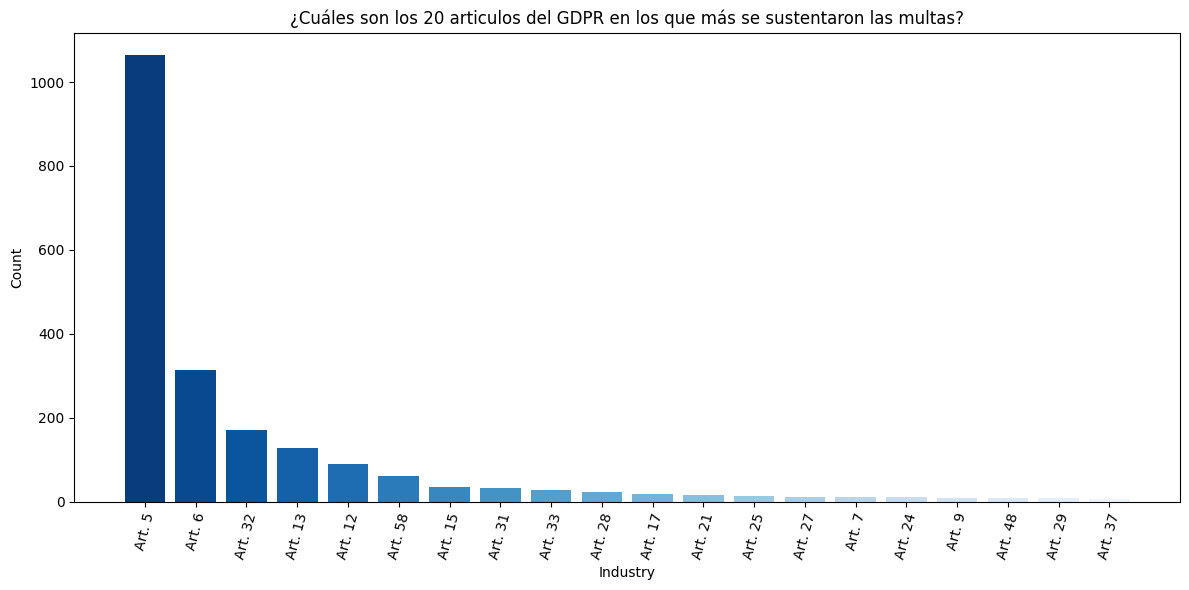

In [6]:
#cuales son los articulos 20 que mas se infringieron?

df['law'] = df['law'].str.replace(r'Art\.\s*\\d+\s*\([^)]+\)', r'Art. \\d+', regex=True)
article_numbers = df['law'].str.extract(r'(Art\.\s*\d+)')
df_aux = article_numbers[0].value_counts().head(20)

colors = sns.color_palette("Blues", len(df_aux))[::-1]

plt.figure(figsize=(12, 6))
plt.bar(df_aux.index, df_aux, color=colors)  #
plt.xlabel('Industry')
plt.ylabel('Count')
plt.title('¿Cuáles son los 20 articulos del GDPR en los que más se sustentaron las multas?')
plt.xticks(rotation=75)  

# Show the plot
plt.tight_layout()
plt.show()

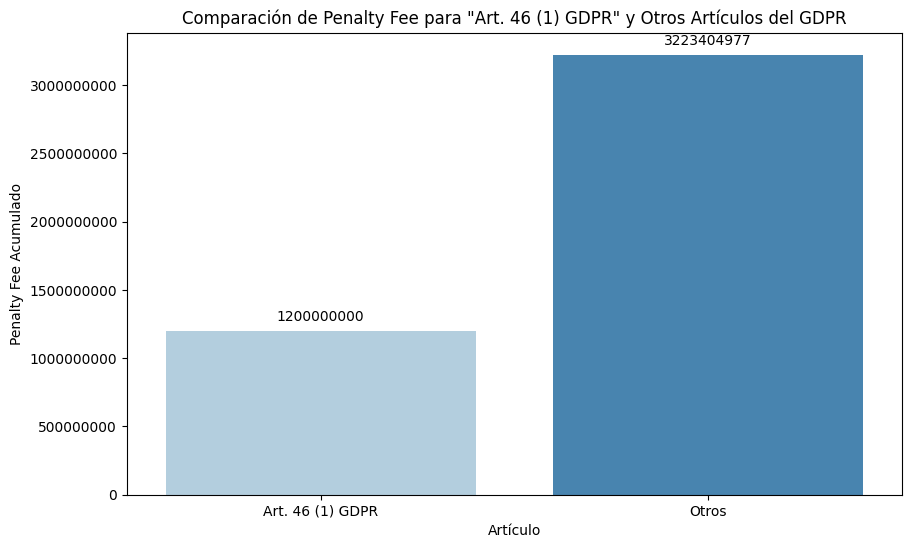

In [14]:

df_aux = df.drop(columns=['index'], errors='ignore')

df_aux = df_aux.reset_index()

# Handle non-numeric values in 'penalty_fee' column
df_aux['penalty_fee'] = pd.to_numeric(df_aux['penalty_fee'], errors='coerce')

# Create a new column for grouping "Art. 46 (1) GDPR" and other values
df_aux['grouped_law'] = 'Otros'
df_aux.loc[df_aux['law'] == 'Art. 46 (1) GDPR', 'grouped_law'] = 'Art. 46 (1) GDPR'

# Group by the new column and sum
df_grouped = df_aux.groupby('grouped_law')['penalty_fee'].sum()

# Create the cumulative bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_grouped.index, y=df_grouped, hue=df_grouped.index, palette="Blues")

# Add count annotations on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Format y-axis ticks as plain numbers
plt.ticklabel_format(style='plain', axis='y') 

# Labels and title
plt.xlabel('Artículo')
plt.ylabel('Penalty Fee Acumulado')
plt.title('Comparación de Penalty Fee para "Art. 46 (1) GDPR" y Otros Artículos del GDPR')
plt.show()

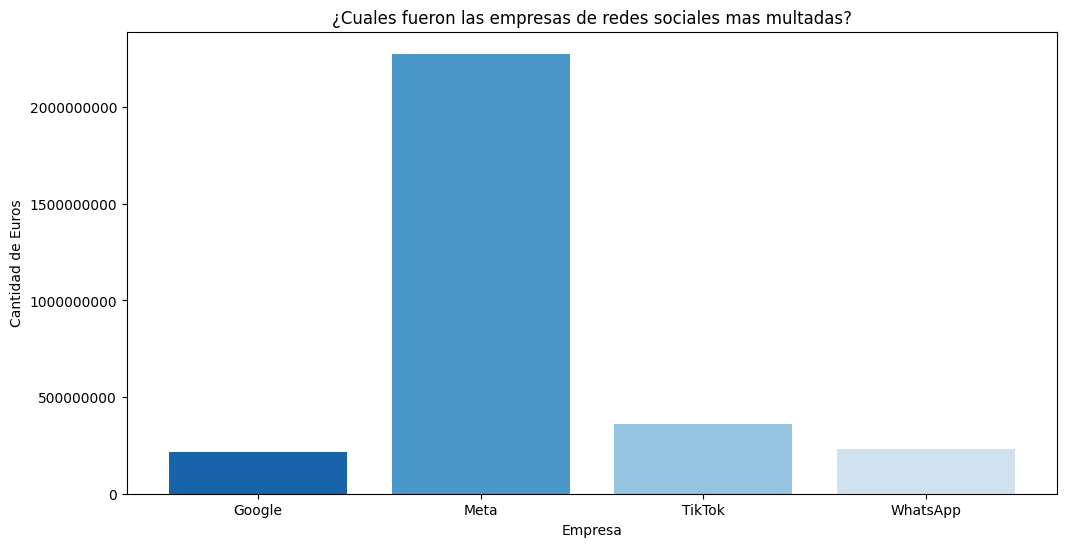

In [8]:
#Que tan presentes estan las multas en empresas de redes sociales?
df_aux = df.query('subjet.str.contains("Meta|TikTok|Google|WhatsApp", case=False, na=False)', engine='python').copy()
reemplazos = {
    r'.*Google.*': 'Google',
    r'.*Meta.*': 'Meta',
    r'.*WhatsApp.*': 'WhatsApp',
    r'.*TikTok.*': 'TikTok'
}

df_aux['subjet'] = df_aux['subjet'].replace(reemplazos, regex=True)
df_aux = df_aux.groupby('subjet')['penalty_fee'].sum().reset_index().tail(4)
colors = sns.color_palette("Blues", len(df_aux))[::-1]

plt.figure(figsize=(12, 6))
plt.bar(df_aux.subjet, df_aux.penalty_fee, color=colors)  # Usa plt.barh para un gráfico de barras horizontal
plt.ticklabel_format(style='plain', axis='y') 
plt.xlabel('Empresa')  # Invierte los títulos de los ejes x y y
plt.ylabel('Cantidad de Euros')
plt.title('¿Cuales fueron las empresas de redes sociales mas multadas?')
plt.show()

In [9]:
df["date"] = pd.to_datetime(df["date"])

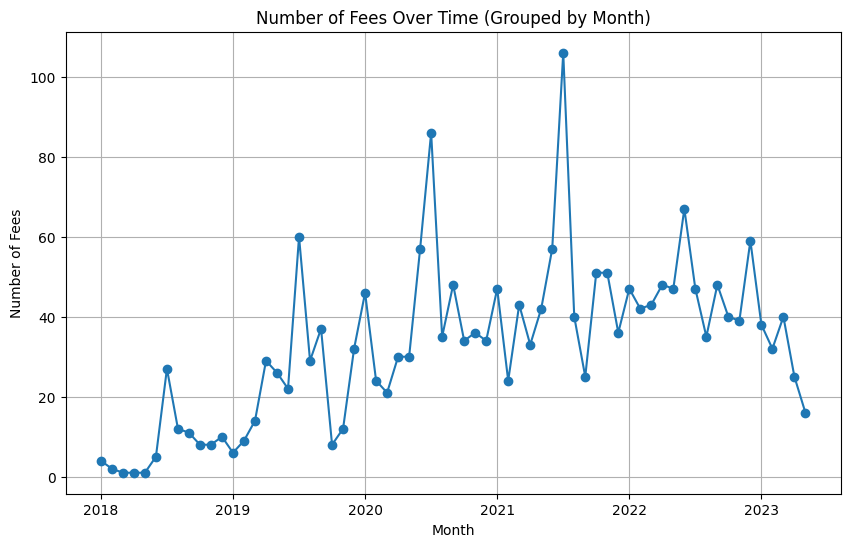

In [13]:
fee_counts = df.groupby(df['date'].dt.to_period("M")).size().reset_index(name='fee_count')

fee_counts['date'] = fee_counts['date'].astype(str)

fee_counts['year'] = fee_counts['date'].str[:4]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(fee_counts['date'], fee_counts['fee_count'], marker='o', linestyle='-')

plt.xticks(fee_counts['date'][::12], fee_counts['year'][::12])

plt.title('Numero de multas a travez del tiempo')
plt.xlabel('Month')
plt.ylabel('Number of Fees')
plt.grid(True)

plt.show()

In [29]:
df_aux = df.sort_values(by="penalty_fee", ascending=False).head(5)

pd.set_option('display.float_format', lambda x: '%.0f' % x)


In [35]:
df_aux


,country,authority,date,penalty_fee,subjet,subjet_industry,law,summary_law,summary_case,court_file
id_case,,,,,,,,,,
ETid-1844,IRELAND,Data Protection Authority of Ireland,2023-05-12,1200000000,Meta Platforms Ireland Limited,"Media, Telecoms and Broadcasting",Art. 46 (1) GDPR,Insufficient legal basis for data processing,The Irish DPA (DPC) has fined Meta Platforms I...,https://dataprotection.ie/en/news-media/press-...
ETid-778,LUXEMBOURG,National Commission for Data Protection (CNPD),2021-07-16,746000000,Amazon Europe Core S.à.r.l.,Industry and Commerce,Unknown,Non-compliance with general data processing pr...,"In its quarterly report, Amazon.com Inc. annou...",https://www.sec.gov/ix?doc=/Archives/edgar/dat...
ETid-1373,IRELAND,Data Protection Authority of Ireland,2022-09-05,405000000,"Meta Platforms, Inc.","Media, Telecoms and Broadcasting","Art. 5 (1) a), c) GDPR, Art. 6 (1) GDPR, Art. ...",Non-compliance with general data processing pr...,The Irish DPA (DPC) has imposed a fine of EUR ...,https://edpb.europa.eu/system/files/2022-09/ed...
ETid-1543,IRELAND,Data Protection Authority of Ireland,2023-01-04,390000000,Meta Platforms Ireland Limited,"Media, Telecoms and Broadcasting","Art. 5 (1) a) GDPR, Art. 6 (1) GDPR, Art. 12 G...",Non-compliance with general data processing pr...,The Irish DPA (DPC) has fined Meta Platforms I...,https://dataprotection.ie/en/news-media/data-p...
ETid-2032,IRELAND,Data Protection Authority of Ireland,2023-09-01,345000000,TikTok Limited,"Media, Telecoms and Broadcasting","Art. 5 (1) c), 5 (1) f) GDPR, Art. 12 (1) GDPR...",Non-compliance with general data processing pr...,"The Irish DPA (DPC), has imposed a fine of EUR...",https://edpb.europa.eu/system/files/2023-09/fi...


In [ ]:
#Tiene multas LinkedIn?
df.query('subjet.str.contains("Microsoft|LinkedIn", case=False, na=False)', engine='python')

,country,authority,date,penalty_fee,subjet,subjet_industry,law,summary_law,summary_case,court_file
id_case,,,,,,,,,,


In [117]:
df_arg = pd.read_csv("clean_data_arg.csv", index_col=0)

In [118]:
df_arg

,index,Tipo,Numero,Categoria,Estado,Texto,Fecha,Monto,Empresa
0,928,Resolución,17/2019,Datos Personales,No firme,https://www.argentina.gob.ar/sites/default/fil...,12/02/2019,3000000,0
1,929,Resolución,18/2019,Datos Personales,No firme,https://www.argentina.gob.ar/sites/default/fil...,12/02/2019,80000,1
2,930,Resolución,19/2019,Datos Personales,No firme,https://www.argentina.gob.ar/sites/default/fil...,12/02/2019,50000,2
3,931,Resolución,20/2019,Datos Personales,No firme,https://www.argentina.gob.ar/sites/default/fil...,12/02/2019,25100,2
4,932,Resolución,21/2019,Datos Personales,No firme,https://www.argentina.gob.ar/sites/default/fil...,12/02/2019,3000000,0
...,...,...,...,...,...,...,...,...,...
228,2633,Resolución,135/2023,Datos Personales,No firme,https://www.argentina.gob.ar/sites/default/fil...,25/07/2023,3000000,1
230,2708,Resolución,199/2023,Datos Personales,No firme,https://www.argentina.gob.ar/sites/default/fil...,13/10/2023,25000,0
231,2709,Resolución,175/2023,Datos Personales,No firme,https://www.argentina.gob.ar/sites/default/fil...,13/10/2023,285000,111
232,2710,Resolución,154/2023,Datos Personales,No firme,https://www.argentina.gob.ar/sites/default/fil...,16/08/2023,185000,7


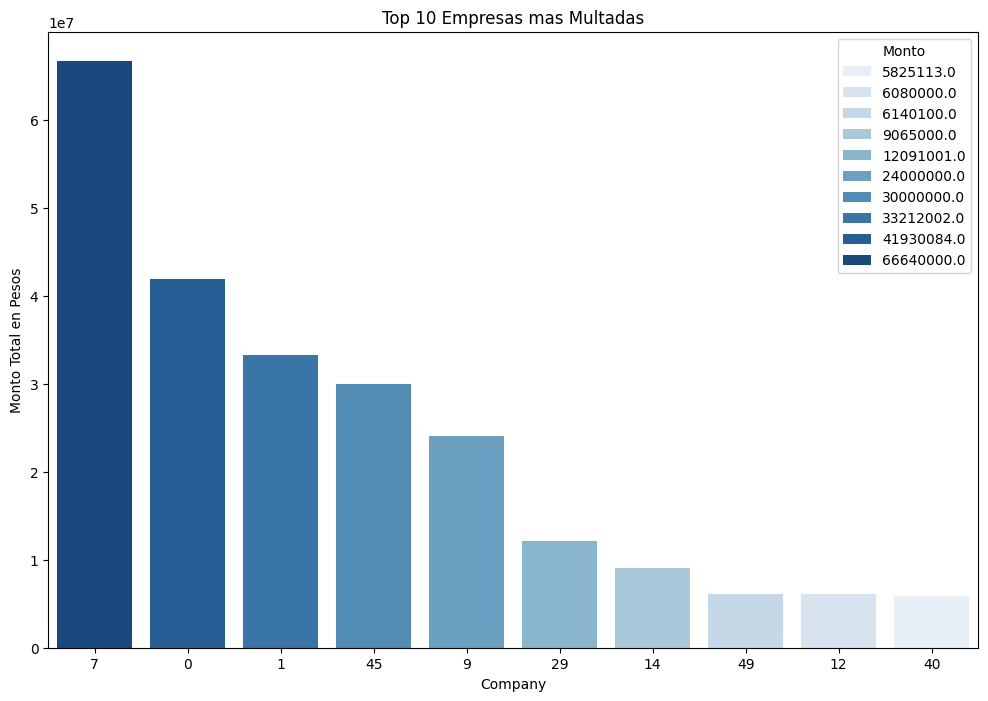

In [145]:
empresas_mas_multadas = df_arg.groupby("Empresa")["Monto"].sum().sort_values(ascending=False).head(10).reset_index()


empresas_mas_multadas = empresas_mas_multadas.sort_values(by='Monto', ascending=False)

plt.figure(figsize=(12, 8))

colors = sns.color_palette("Blues", len(empresas_mas_multadas))

sns.barplot(x='Empresa', y='Monto', data=empresas_mas_multadas, hue = empresas_mas_multadas["Monto"], palette=colors, order=empresas_mas_multadas['Empresa'])

# Customize the plot1
plt.title('Top 10 Empresas mas Multadas')
plt.xlabel('Company')
plt.ylabel('Monto Total en Pesos')
plt.show()



In [148]:
df_arg["Monto"].sum()

270308680.0

In [146]:
empresas_mas_multadas["Monto"].sum()

234983300.0

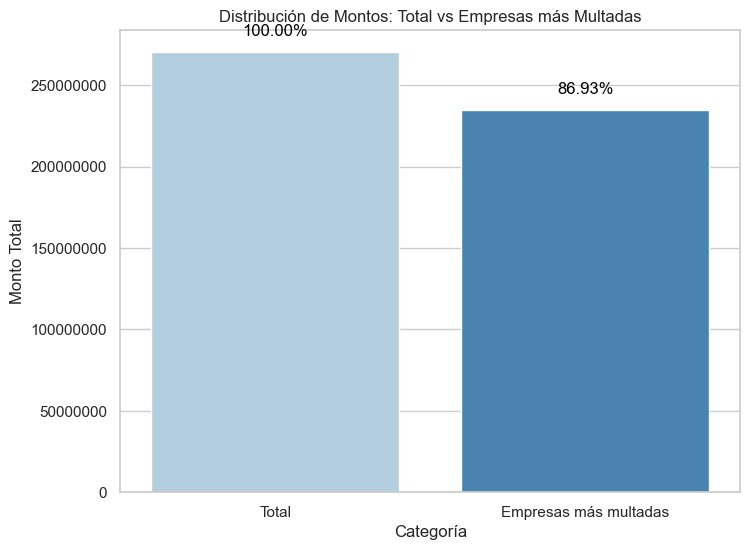

In [163]:
import matplotlib.cm as cm

# Datos
total_monto = 270308680.0
monto_empresas_mas_multadas = 234983300.0

# Etiquetas y valores
etiquetas = ['Total', 'Empresas más multadas']
valores = [total_monto, monto_empresas_mas_multadas]

# Crear un gráfico de barras con Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=etiquetas, y=valores, hue=etiquetas, palette="Blues")

# Agregar etiquetas y título
plt.ticklabel_format(style='plain', axis='y') 

plt.xlabel('Categoría')
plt.ylabel('Monto Total')
plt.title('Distribución de Montos: Total vs Empresas más Multadas')

# Mostrar el porcentaje en las barras
for i, v in enumerate(valores):
    ax.text(i, v + 10000000, f'{(v / total_monto) * 100:.2f}%', color='black', ha='center')

# Mostrar el gráfico
plt.show()

In [147]:
df_arg["Estado"].value_counts()

No firme    225
Firme         5
Name: Estado, dtype: int64

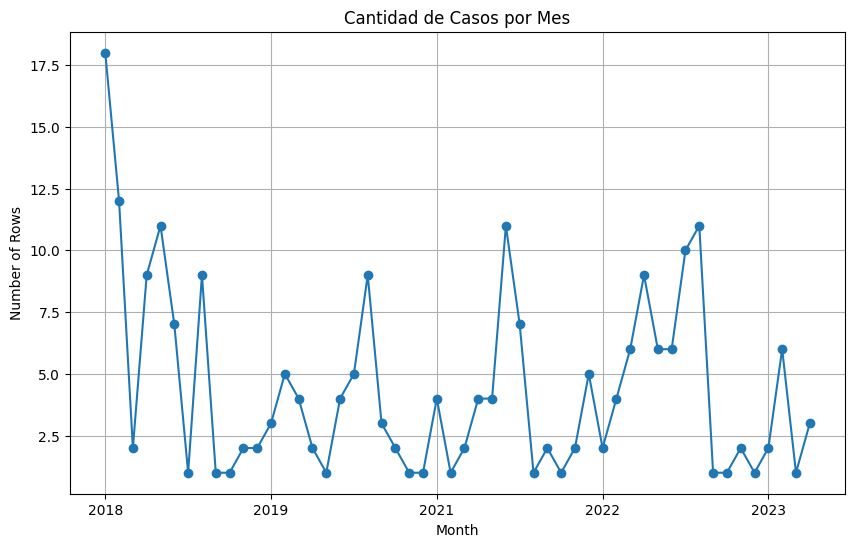

In [40]:
df_arg["Fecha"] = pd.to_datetime(df_arg["Fecha"], format='%d/%m/%Y')

monthly_counts = df_arg.groupby(df_arg['Fecha'].dt.to_period("M")).size().reset_index(name='row_count')

monthly_counts['Fecha'] = monthly_counts['Fecha'].astype(str)

monthly_counts['Year'] = monthly_counts['Fecha'].str[:4]

plt.figure(figsize=(10, 6))
plt.plot(monthly_counts['Fecha'], monthly_counts['row_count'], marker='o', linestyle='-')

plt.xticks(monthly_counts['Fecha'][::12], monthly_counts['Year'][::12])

plt.title('Cantidad de Casos por Mes en Argentina')
plt.xlabel('Month')
plt.ylabel('Number of Rows')
plt.grid(True)
plt.show()